# Regression for house price prediciton

In [1]:
import numpy as np
import pandas as pd
import seaborn

Numpy is the numerical library of python which performs mathematical operations. Support for many functions (We can see the documentation by shift+tab )
Pandas is a data analysis library. It is the most preffered library in python for data analysis. Provides an interface which is logical eg if u want to read the whole datafile and store in a variable dataset

In [2]:
dataset = pd.read_csv("/home/naman/Desktop/kc_house_data.csv",delimiter=',',verbose = True)

Tokenization took: 163.15 ms
Type conversion took: 68.49 ms
Parser memory cleanup took: 0.01 ms


Every machine learning algorithm in a way creates a hypothesis function 
$$ h = \theta _0 + \theta _1 * f(x_1) + \theta _2 * f(x_2) + ... + \theta _n* f(x_n) $$
Which is learned and derived from the data.

As the algorithm sees data, it learns more about the houses and the factors that affect the house price. It will see how each factor affects the price e.g. Square Feet is a good measure, but I dont think ID of the house is a big factor affecting the house price!

Problem arises in the fact that "maybe" my algorithm instead of learing the importance of factors and coming with a good hypothesis starts performing cheap tricks like learning exactly what the house prices were! To monitor if this happens, we create what we call the test set! It's a collection of house data which my learning algorithm will never see.

In [3]:
train = dataset.sample(frac=0.8,random_state=200)
test = dataset.drop(train.index)

# Starting to familiarize with the pandas format

In [4]:
#how easy is it to take a column and assign it to a new variable?
prices1_15 = dataset['price'][0:5]
print prices1_15

#how to take average of all the house prices?
avg = sum(dataset['price'])/len(dataset['price'])
print "average is ",avg

#or more easily as
print dataset['price'].mean()

#how to see name of columns only?
print train.columns

# how to see dimension of data?
print train.shape

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64
average is  540088.141767
540088.141767
Index([u'id', u'date', u'price', u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated',
       u'zipcode', u'lat', u'long', u'sqft_living15', u'sqft_lot15'],
      dtype='object')
(17290, 21)


# Lets try the most basic regression technique i.e. Linear Regression for 1 parameter: square feet vs price   

It is always a good idea to see what you are dealing with. Here let us see how the data acurally is distributed.

Henceforth we deal with train dataset. It is always a bad idea to include test set in learning!!


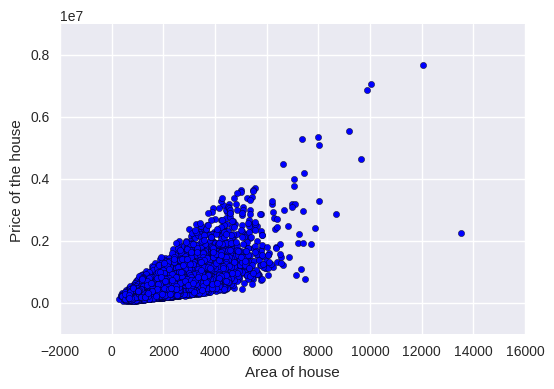

In [5]:
#python's graph library is called matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(train['sqft_living'],train['price'])
plt.xlabel("Area of house")
plt.ylabel("Price of the house")


In [6]:
#a handy function for y = mx+c
def lin(m,c,x): return m*x+c

How do we start a game if we have no instructions? Randomly! Consider this as a similar process

You need to fit a line passing through the points which will be displayed in the graph

You initialize the parameters of line randomly

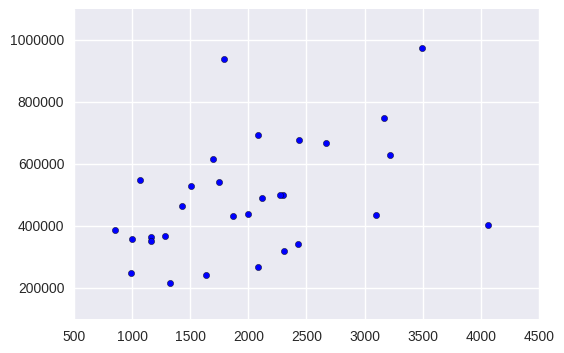

In [17]:
#lets do this on first on 30 houses only
%matplotlib inline
#This is called a magic statement. This setting allows us to plot the graph inside the notebook
from numpy.random import random
import matplotlib.pyplot as plt
n=30
x = train['sqft_living'][0:n]
y = train['price'][0:n]
plt.scatter(x,y)
x = (x/x.mean()).as_matrix()
y = (y/y.mean()).as_matrix()

This is a line fitting problem, slope and intercept is unknown currently!
So the first logical step. ASSUME! let hypothetical m $ = h_m $ and hypothetical c $ = h_c $

sse = sum of squared error : It means if I use that hypothesized line, how far from my line is the actual line!? 

$$ squaredE = (y - h_m * x -h_c)^2 $$

$$ sse = \Sigma squaredE $$

loss = just a fancy wrapper to call sse (Technically there are many loss functions like sse,mean squared error,log loss,KL divergence, etc)<br> 
The flow of regression using gradient descent is
1. Initially assign random parameters hm and hc
2. Fit line on the data $y_{output}$ = $ hm*x + hc$
3. Calculate the loss: there are many types of loss, I'm using Sum of squared errors (sse)
4. update the values of hm and hc as 
$$hm_{new} = hm_{old} - \eta * \delta _ {hm}  sse $$
$$hc_{new} = hc_{old} - \eta * \delta _ {hc}  sse $$


In [8]:
hm = 5
hc = 2
#The most compact representation for 
#sse- sum of squared errors: 

def sse(y,y_pred): 
    return ((y-y_pred)**2).sum()

def loss(y,m,c,x): 
    return sse(y, lin(m,c,x))

def avg_loss(y,m,c,x): 
    return np.sqrt(loss(y,m,c,x)/n)

Derivate the loss function with respect to m and with respect to c
$$ sse = f(y,h_m * x + h_c) = (y - h_m * x + h_c)^2 $$

In [15]:
#The update function defined !
lr = 0.001
def upd():
    global hm, hc
    y_pred = lin(hm, hc, x)
    dydc =  -2*(y - y_pred)                                          
    dydm =   x*dydc                                         
    hm -= lr*dydm.mean()

    hc -= lr*dydc.mean()

In [18]:
#just an animation.Requires ffmpeg and flash plugin to run!
%matplotlib inline
from matplotlib import pyplot as plt, rcParams, animation, rc
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
hm = 0.3
hc = 0.2
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
tempy = lin(hm,hc,x)
line, = plt.plot(x,tempy)
plt.close()

def animate(i):
    line.set_ydata(lin(hm,hc,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 180), interval=100)
ani

In [11]:
#On the whole dataset we get
x = (train['sqft_living']/train['sqft_living'].mean()).as_matrix()
y = (train['price']/train['price'].mean()).as_matrix()
hm = 3
hc = 2
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(hm,hc,x))
plt.close()

def animate(i):
    line.set_ydata(lin(hm,hc,x))
    for i in range(30): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 180), interval=100)
ani

NameError: global name 'sigmoid' is not defined

In [12]:
#THUS We fit a line through the dataset and get ready for prediciting house prices!
#lets see how good/bad we are going at it!
#predict all the prices in test set and see your average error using sum of squared error loss
#Can we do better? 


We have a lot of other info in the dataset. Can we use it? Is the number of bedrooms relevant to the price of house? Is location a factor? 


# Multivariable Linear Regression 


We've seen the update function which is pretty simple and involves a differentiation. In multi-dimensions, differentiaiton becomes gradient $ \delta _ { \theta _ i } Error $ on each dimension!. Where from the previous example, if its just 2D data, $ \theta _0 = h_c $ and $ \theta _1 = h_m $

#TO DO
Modify the code of upd(). Add a for loop in the update function for $ \theta _i $ updates

In [13]:
#run the update to find all the weights you can get.
# A good suggestion will be to omit certain columns! E.G. I dont think date has any relevance in the price of the house! 